<a href="https://colab.research.google.com/github/Belac44/Phone-Price-Classification-/blob/main/Mobile_Price_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('mobile_dataset.csv')
df.shape

(2000, 21)

## Exploratory Data Analysis

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# There are no missing values.
# There are no objects
# All our features are numerical

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# lets checl for the presence of categorical features

[df[features].value_counts() for features in df.columns]

[1872    6
 1589    6
 618     6
 1413    5
 1715    5
        ..
 1199    1
 1202    1
 1203    1
 1204    1
 1998    1
 Name: battery_power, Length: 1094, dtype: int64,
 0    1010
 1     990
 Name: blue, dtype: int64,
 0.5    413
 2.8     85
 2.3     78
 2.1     76
 1.6     76
 2.5     74
 0.6     74
 1.4     70
 1.3     68
 2.0     67
 1.5     67
 1.9     65
 0.7     64
 2.9     62
 1.8     62
 1.0     61
 1.7     60
 2.2     59
 2.4     58
 0.8     58
 0.9     58
 1.2     56
 2.6     55
 2.7     55
 1.1     51
 3.0     28
 Name: clock_speed, dtype: int64,
 1    1019
 0     981
 Name: dual_sim, dtype: int64,
 0     474
 1     245
 2     189
 3     170
 5     139
 4     133
 6     112
 7     100
 9      78
 8      77
 10     62
 11     51
 12     45
 13     40
 16     24
 15     23
 14     20
 18     11
 17      6
 19      1
 Name: fc, dtype: int64,
 1    1043
 0     957
 Name: four_g, dtype: int64,
 27    47
 16    45
 14    45
 2     42
 57    42
       ..
 25    24
 38    23
 62  

In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
# Blue,dual-sim,four-g,n-cores,three-g,touvh-screen and wifi seem to be categorical features.We can also
# add others to the list as we explore the dataset

<AxesSubplot:>

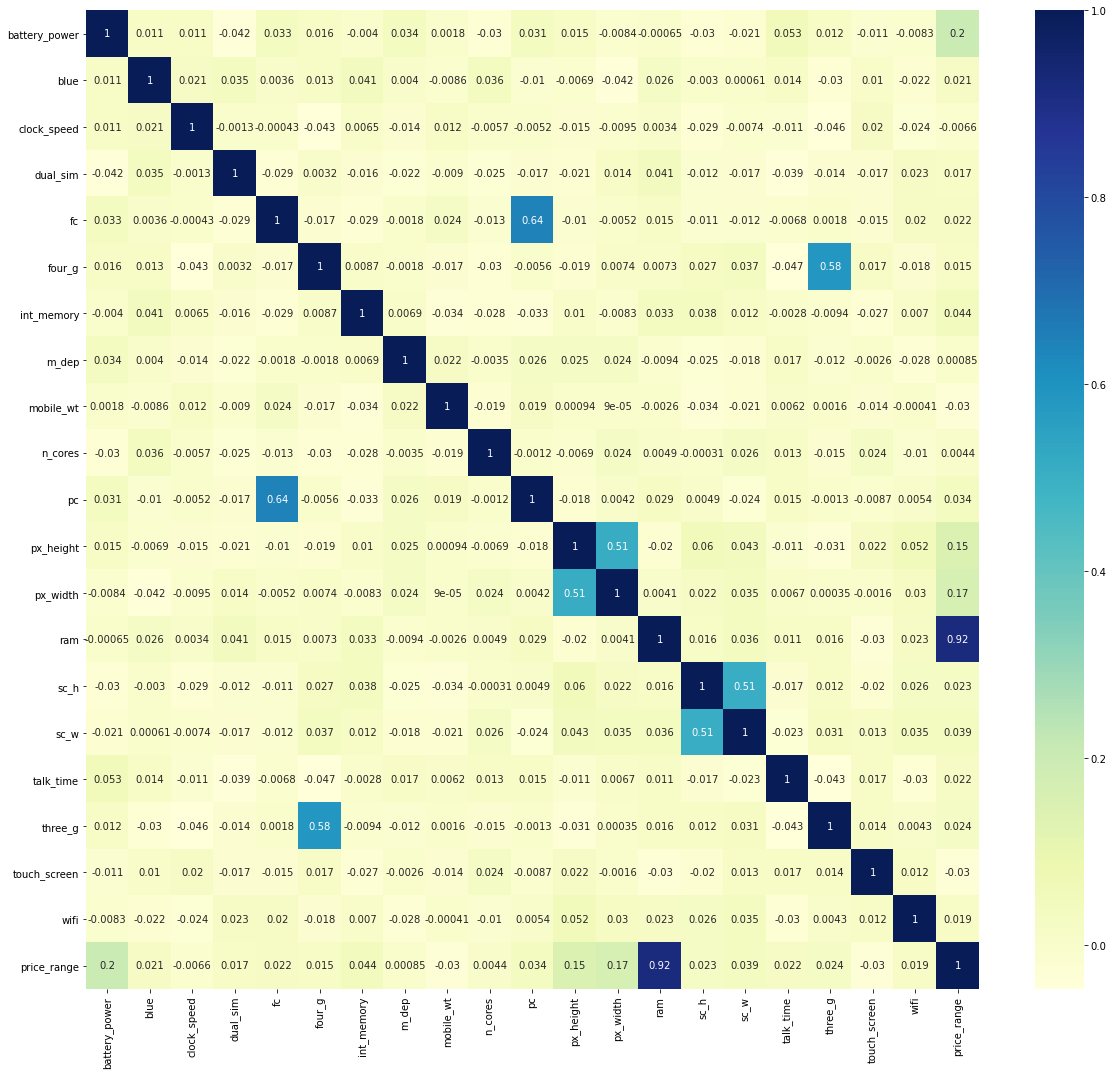

In [ ]:
# Lets first observe the correlation between the features
plt.figure(figsize = (20,18))
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot = True)

In [ ]:
# ram is highly correlated with the price_range which is good for our model.Other features are not 
# highly correlated.No features have over 0.7 correlation

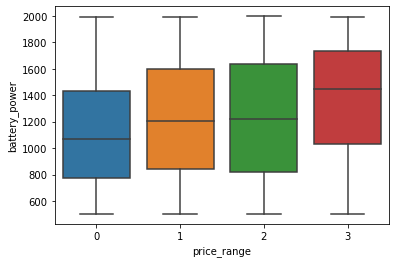

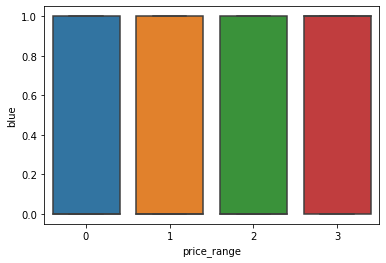

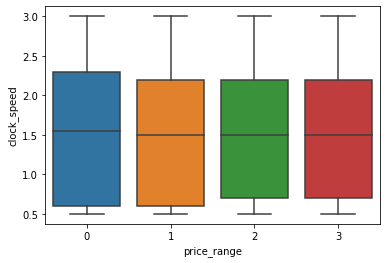

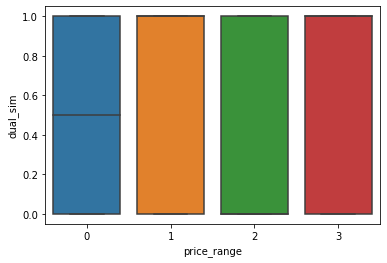

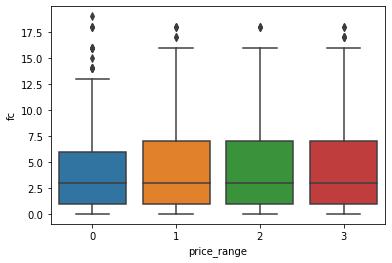

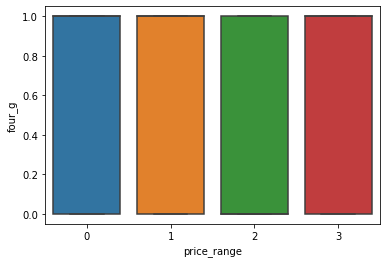

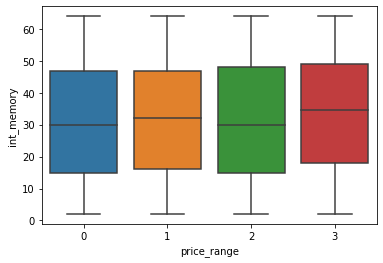

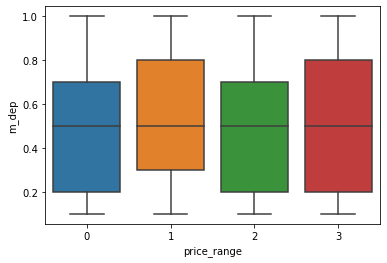

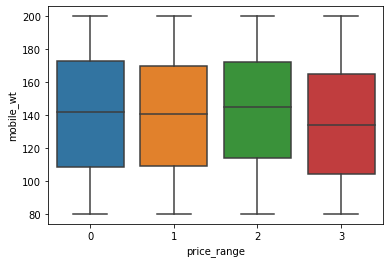

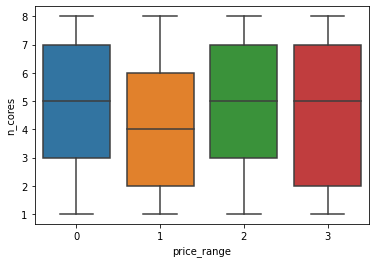

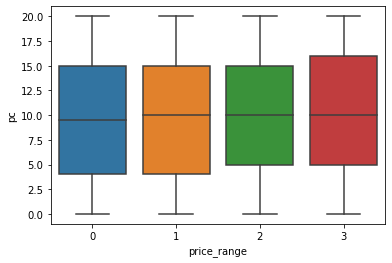

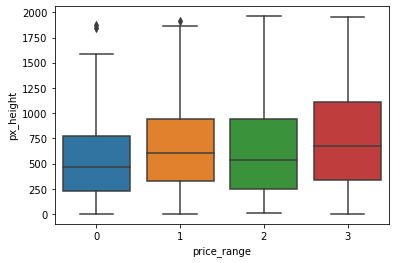

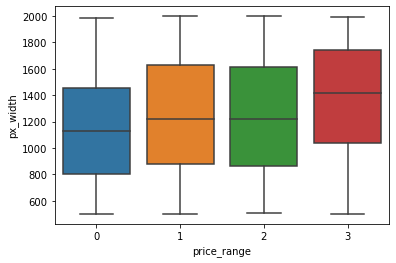

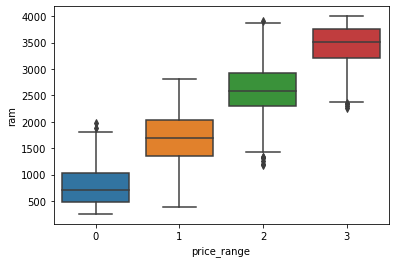

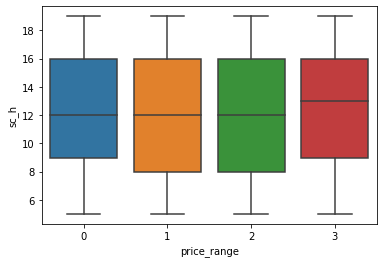

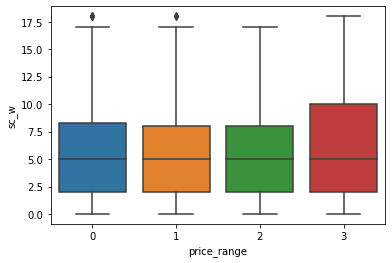

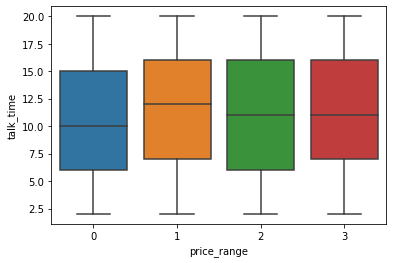

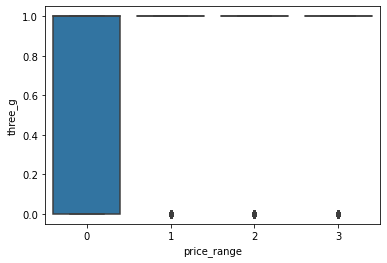

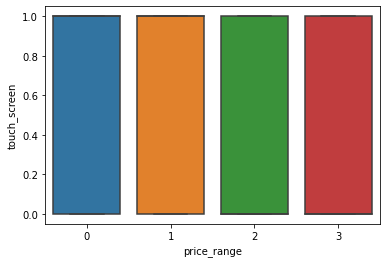

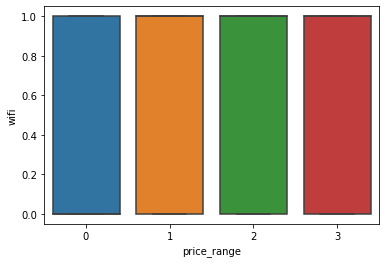

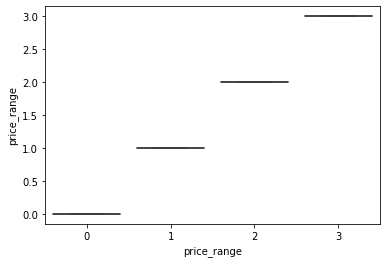

In [ ]:
#Lets look for the presence of outliers
for features in df.columns:
    sns.boxplot(x = df['price_range'],y = df[features])
    plt.show()

In [ ]:
# There looks to be some significant outliers in fc column.However,fc is a categorical features so skwness mus have been the
# possible reason to get outliers.

## Feature Engineering

In [ ]:
# Lets first deal with categorical features that we will convert to dummies

cat_cols = df[['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi','m_dep']]#We have limited to 10 unique items
cat_cols.head()

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi,m_dep
0,0,0,0,2,0,0,1,0.6
1,1,1,1,3,1,1,0,0.7
2,1,1,1,5,1,1,0,0.9
3,1,0,0,6,1,0,0,0.8
4,1,0,1,2,1,1,0,0.6


In [ ]:
#clock_speed is an Ordinal data so we will convert it to such using the map function

map_function = {}
for number,value in zip(np.round(np.arange(0.5,3.1,step = 0.1),1),np.arange(1,27,step = 1)):
    map_function[number] = value

In [ ]:
map_function

{0.5: 1,
 0.6: 2,
 0.7: 3,
 0.8: 4,
 0.9: 5,
 1.0: 6,
 1.1: 7,
 1.2: 8,
 1.3: 9,
 1.4: 10,
 1.5: 11,
 1.6: 12,
 1.7: 13,
 1.8: 14,
 1.9: 15,
 2.0: 16,
 2.1: 17,
 2.2: 18,
 2.3: 19,
 2.4: 20,
 2.5: 21,
 2.6: 22,
 2.7: 23,
 2.8: 24,
 2.9: 25,
 3.0: 26}

In [ ]:
df['clock_speed'] = df['clock_speed'].map(map_function)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,18,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,1,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,1,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,21,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,8,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df['clock_speed'].value_counts()

1     413
24     85
19     78
17     76
12     76
21     74
2      74
10     70
9      68
11     67
16     67
15     65
3      64
25     62
14     62
6      61
13     60
18     59
20     58
5      58
4      58
8      56
22     55
23     55
7      51
26     28
Name: clock_speed, dtype: int64

In [ ]:
# Lets get dummy variables from our categorical features

df =pd.get_dummies(df,columns = cat_cols.columns,drop_first = True)
df.head()

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,...,wifi_1,m_dep_0.2,m_dep_0.3,m_dep_0.4,m_dep_0.5,m_dep_0.6,m_dep_0.7,m_dep_0.8,m_dep_0.9,m_dep_1.0
0,842,18,1,7,188,2,20,756,2549,9,...,1,0,0,0,0,1,0,0,0,0
1,1021,1,0,53,136,6,905,1988,2631,17,...,0,0,0,0,0,0,1,0,0,0
2,563,1,2,41,145,6,1263,1716,2603,11,...,0,0,0,0,0,0,0,0,1,0
3,615,21,0,10,131,9,1216,1786,2769,16,...,0,0,0,0,0,0,0,1,0,0
4,1821,8,13,44,141,14,1208,1212,1411,8,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   battery_power   2000 non-null   int64
 1   clock_speed     2000 non-null   int64
 2   fc              2000 non-null   int64
 3   int_memory      2000 non-null   int64
 4   mobile_wt       2000 non-null   int64
 5   pc              2000 non-null   int64
 6   px_height       2000 non-null   int64
 7   px_width        2000 non-null   int64
 8   ram             2000 non-null   int64
 9   sc_h            2000 non-null   int64
 10  sc_w            2000 non-null   int64
 11  talk_time       2000 non-null   int64
 12  price_range     2000 non-null   int64
 13  blue_1          2000 non-null   uint8
 14  dual_sim_1      2000 non-null   uint8
 15  four_g_1        2000 non-null   uint8
 16  n_cores_2       2000 non-null   uint8
 17  n_cores_3       2000 non-null   uint8
 18  n_cores_4       2000 non-nul

In [ ]:
# Lets observe the distribution of the target variable
df['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

In [ ]:
#No imblalance whatsover.
#We can remove the target from our independent features
X = df.drop(columns = 'price_range')
y = df['price_range']

In [ ]:
X.head()

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,...,wifi_1,m_dep_0.2,m_dep_0.3,m_dep_0.4,m_dep_0.5,m_dep_0.6,m_dep_0.7,m_dep_0.8,m_dep_0.9,m_dep_1.0
0,842,18,1,7,188,2,20,756,2549,9,...,1,0,0,0,0,1,0,0,0,0
1,1021,1,0,53,136,6,905,1988,2631,17,...,0,0,0,0,0,0,1,0,0,0
2,563,1,2,41,145,6,1263,1716,2603,11,...,0,0,0,0,0,0,0,0,1,0
3,615,21,0,10,131,9,1216,1786,2769,16,...,0,0,0,0,0,0,0,1,0,0
4,1821,8,13,44,141,14,1208,1212,1411,8,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   battery_power   2000 non-null   int64
 1   clock_speed     2000 non-null   int64
 2   fc              2000 non-null   int64
 3   int_memory      2000 non-null   int64
 4   mobile_wt       2000 non-null   int64
 5   pc              2000 non-null   int64
 6   px_height       2000 non-null   int64
 7   px_width        2000 non-null   int64
 8   ram             2000 non-null   int64
 9   sc_h            2000 non-null   int64
 10  sc_w            2000 non-null   int64
 11  talk_time       2000 non-null   int64
 12  blue_1          2000 non-null   uint8
 13  dual_sim_1      2000 non-null   uint8
 14  four_g_1        2000 non-null   uint8
 15  n_cores_2       2000 non-null   uint8
 16  n_cores_3       2000 non-null   uint8
 17  n_cores_4       2000 non-null   uint8
 18  n_cores_5       2000 non-nul

In [ ]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

## Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 17)

In [ ]:
# Lets explore for constant features
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()
transformed_features = vt.fit_transform(X_train)

In [ ]:
X = pd.DataFrame(transformed_features,columns = X_train.columns)

In [ ]:
X.head()

,battery_power,clock_speed,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,...,wifi_1,m_dep_0.2,m_dep_0.3,m_dep_0.4,m_dep_0.5,m_dep_0.6,m_dep_0.7,m_dep_0.8,m_dep_0.9,m_dep_1.0
0,536,20,12,3,182,14,1386,1539,284,12,...,0,0,1,0,0,0,0,0,0,0
1,1285,4,4,11,199,7,1791,1896,3966,17,...,1,0,0,0,0,0,0,1,0,0
2,1830,1,5,14,160,6,773,1353,1905,16,...,1,0,0,0,0,0,0,1,0,0
3,1108,25,10,52,183,12,130,1706,3264,16,...,1,0,0,0,0,0,0,0,0,0
4,947,4,0,22,197,13,1176,1220,2842,16,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We do not have constant feaures

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ordered_rank_features=SelectKBest(score_func=chi2,k=34)
ordered_feature=ordered_rank_features.fit(X_train,y_train)

In [ ]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [ ]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
features_rank.columns=['Features','Score']
features_rank.sort_values(by = 'Score',ascending = False)

,Features,Score
8,ram,652119.398412
6,px_height,9828.319717
0,battery_power,8348.375369
7,px_width,6598.523742
4,mobile_wt,122.474603
3,int_memory,102.966742
10,sc_w,25.085459
1,clock_speed,11.381571
11,talk_time,9.250131
5,pc,8.328023


In [ ]:
# Lets do Feature Importance using Extra Tree Classifier
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
print(etc.feature_importances_)

[0.05067912 0.03163138 0.03130547 0.03453411 0.03430493 0.03189841
 0.03999886 0.04503982 0.32434326 0.0326765  0.03234486 0.03351841
 0.01997733 0.02001955 0.01817281 0.01094465 0.01116402 0.0117595
 0.01123978 0.01081498 0.01166681 0.01219818 0.01485125 0.01835386
 0.01924197 0.0100487  0.00995454 0.00945653 0.01108787 0.00952653
 0.00998976 0.01031338 0.01009065 0.0068522 ]


In [ ]:
ordered_importance = pd.DataFrame(etc.feature_importances_,index = X_train.columns,columns = ['Score Value'])
ordered_importance.sort_values(by = 'Score Value',ascending = False)

,Score Value
ram,0.324343
battery_power,0.050679
px_width,0.045040
px_height,0.039999
int_memory,0.034534
mobile_wt,0.034305
talk_time,0.033518
sc_h,0.032677
sc_w,0.032345
pc,0.031898


In [ ]:
features_comparison = pd.DataFrame(ordered_importance.index,features_rank['Features'],columns = ['SelectKBest'])
features_comparison

,SelectKBest
Features,
battery_power,battery_power
clock_speed,clock_speed
fc,fc
int_memory,int_memory
mobile_wt,mobile_wt
pc,pc
px_height,px_height
px_width,px_width
ram,ram


In [ ]:
# The results are the same from both approaches

## Model Building

#### 1.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DTC.predict(X_test)
y_pred_ = DTC.predict(X_train)

In [ ]:
from sklearn.metrics import f1_score

print("Training Set score:",f1_score(y_pred = y_pred_,y_true = y_train,average = 'weighted'))
print("Test Set score:",f1_score(y_pred = y_pred,y_true = y_test,average = 'weighted'))

Training Set score: 1.0
Test Set score: 0.8356965945118519


#### 2.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
y_pred_ = rfc.predict(X_train)

In [ ]:
print("Training Set score:",f1_score(y_pred = y_pred_,y_true = y_train,average = 'weighted'))
print("Test Set score:",f1_score(y_pred = y_pred,y_true = y_test,average = 'weighted'))

Training Set score: 1.0
Test Set score: 0.846486200705874


#### 3.Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gbc.predict(X_test)
y_pred_ = gbc.predict(X_train)

In [ ]:
print("Training Set score:",f1_score(y_pred = y_pred_,y_true = y_train,average = 'weighted'))
print("Test Set score:",f1_score(y_pred = y_pred,y_true = y_test,average = 'weighted'))

Training Set score: 1.0
Test Set score: 0.8936954062168081


#### 4. K Neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Kn = KNeighborsClassifier()
Kn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = Kn.predict(X_test)
y_pred_ = Kn.predict(X_train)

In [ ]:
print("Training Set score:",f1_score(y_pred = y_pred_,y_true = y_train,average = 'weighted'))
print("Test Set score:",f1_score(y_pred = y_pred,y_true = y_test,average = 'weighted'))

Training Set score: 0.9549692098005331
Test Set score: 0.926966385529617


In [ ]:
# Most models are overfitting,but K Neigbors Classifier seems to be the "Just right" model so we go qith it

In [ ]:
train_scores = []
test_scores = []

def best_features(model):
    for i in range(3,35):
        slf = SelectKBest(score_func=chi2,k = i)
        X_new_train = slf.fit_transform(X_train,y_train)
        X_new_test = slf.transform(X_test)
        
        selected_columns = X_train.columns[slf.get_support(indices = True)]
        new_Xtrain =pd.DataFrame(X_new_train,columns = selected_columns)
        new_Xtest = pd.DataFrame(X_new_test,columns = selected_columns)
        
        model.fit(new_Xtrain,y_train)
        
        y_pred = model.predict(new_Xtest)
        y_pred_ = model.predict(new_Xtrain)
        
        train_scores.append(f1_score(y_pred = y_pred_,y_true = y_train,average = 'weighted'))
        test_scores.append(f1_score(y_pred = y_pred,y_true = y_test,average = 'weighted'))
        
    return train_scores,test_scores
        
        

In [ ]:
model = KNeighborsClassifier()
train_scores,test_scores = best_features(model)

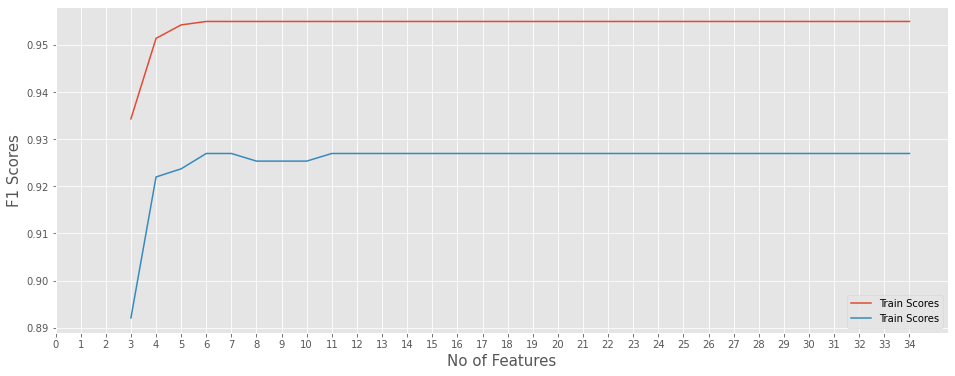

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (16,6))
sns.lineplot(x = np.arange(3,35),y = train_scores,label = 'Train Scores')
sns.lineplot(x = np.arange(3,35),y = test_scores,label = 'Train Scores')
plt.xticks(np.arange(0,35))
plt.xlabel("No of Features",fontsize = 15)
plt.ylabel("F1 Scores",fontsize = 15)
plt.show()


In [ ]:
# Let go with 12 best features
slf = SelectKBest(score_func=chi2,k = 12)
X_new_train = slf.fit_transform(X_train,y_train)
X_new_test = slf.transform(X_test)
        
selected_columns = X_train.columns[slf.get_support(indices = True)]
new_Xtrain =pd.DataFrame(X_new_train,columns = selected_columns)
new_Xtest = pd.DataFrame(X_new_test,columns = selected_columns)
        
model.fit(new_Xtrain,y_train)
        
y_pred = model.predict(new_Xtest)
y_pred_ = model.predict(new_Xtrain)
        
print("Training Set score:",(f1_score(y_pred = y_pred_,y_true = y_train,average = 'weighted')))
print("Test Set Score:",(f1_score(y_pred = y_pred,y_true = y_test,average = 'weighted')))

Training Set score: 0.9549692098005331
Test Set Score: 0.926966385529617
